<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/3.2.%20Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchsummary import summary

In [4]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla K80


# Generate data

In [5]:
# y without noises 
lstX=[]
lstY=[]
for i in range(5000):
  x1 = np.random.normal(0.1, 0.5) # mean and standard deviation
  x2 = np.random.normal(0.6, 0.8)
  x3 = np.random.normal(0.5, 0.8)
  x4 = np.random.normal(0.1, 0.5)
  x5 = np.random.normal(0, 0.7)
  x6 = np.random.normal(0.2, 0.3)
  x7 = np.random.normal(0, 0.3)
  y = 0.455*pow(x1,3)+0.111*x1*x2+0.222*pow(x3,4)+0.888*pow(x6,3)+0.222*pow(x1,2)*x5+0.777*pow(x4,2)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [6]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(np.max(numpyY), np.min(numpyY), np.mean(numpyY), np.std(numpyY))

43.88045028304302 -1.433089464920508 0.823978676666005 1.6978595234894935


In [7]:
# Add noises to y
lstX=[]
lstY=[]
for i in range(5000):
  x1 = np.random.normal(0.1, 0.5) # mean and standard deviation
  x2 = np.random.normal(0.6, 0.8)
  x3 = np.random.normal(0.5, 0.8)
  x4 = np.random.normal(0.1, 0.5)
  x5 = np.random.normal(0, 0.7)
  x6 = np.random.normal(0.2, 0.3)
  x7 = np.random.normal(0, 0.3)
  y = 0.455*pow(x1,3)+0.111*x1*x2+0.222*pow(x3,4)+0.888*pow(x6,3)+0.222*pow(x1,2)*x5+0.777*pow(x4,2)
  y = y +  np.random.normal(2, 3)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [8]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(np.max(numpyY), np.min(numpyY), np.mean(numpyY), np.std(numpyY))

23.257339993095275 -7.535140067622375 2.8449958590983866 3.347866597458333


# Build NN

In [9]:
MyNet = nn.Sequential(
    nn.Linear(7, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
)
MyNet.to(device)
summary(MyNet, input_size=(500, 7))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 500, 128]           1,024
              ReLU-2             [-1, 500, 128]               0
            Linear-3             [-1, 500, 128]          16,512
              ReLU-4             [-1, 500, 128]               0
            Linear-5               [-1, 500, 1]             129
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.96
Params size (MB): 0.07
Estimated Total Size (MB): 2.04
----------------------------------------------------------------


# Run training-test 10 times

optimizer = torch.optim.SGD(...) <br>
torch.optim.Adam

In [ ]:
train_lossLst = []
test_lossLst = []
for i in range(1, 11):
  print("\nTrain-test ", i, end= " ")
  trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  tensorX = torch.FloatTensor(trainX).to(device)
  tensorY = torch.FloatTensor(trainY).to(device)
  torch_dataset = Data.TensorDataset(tensorX, tensorY)
  loader = Data.DataLoader(
      dataset=torch_dataset,  
      batch_size=500,      
      shuffle=True,       
      num_workers=0,    # subprocesses for loading data
  )

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)
  loss_func = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(MyNet.parameters(), lr=0.0003)

  # train NN 
  print("epoch", end=": ")
  epoch_lossLst=[]
  for epoch in range(1, 300):
    if(epoch%100 == 0):
      print(epoch, end=",")
    for (batchX, batchY) in loader:
      batchY_hat = MyNet(batchX)
      loss = loss_func(batchY_hat, batchY)
      epoch_lossLst.append(float(loss))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  train_lossLst.append(epoch_lossLst) 

  tensorX = torch.FloatTensor(testX).to(device)
  tensorY = torch.FloatTensor(testY).to(device)
  tensorY_hat = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  test_lossLst.append(float(loss))


Train-test  1 epoch: 100,200,
Train-test  2 epoch: 100,200,
Train-test  3 epoch: 100,200,
Train-test  4 epoch: 100,200,
Train-test  5 epoch: 100,200,
Train-test  6 epoch: 100,200,
Train-test  7 epoch: 100,200,
Train-test  8 epoch: 100,200,
Train-test  9 epoch: 100,200,
Train-test  10 epoch: 100,200,

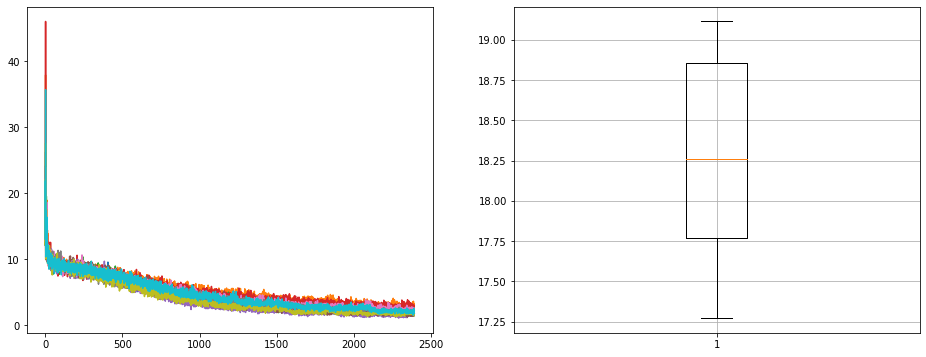

In [ ]:
#take a look at the train loss plot and box plot of test lost
fig=plt.figure(figsize=(16, 6))
fig.add_subplot(1, 2, 1) #1 row, 2 cols
for lst in train_lossLst:
  plt.plot(lst)
fig.add_subplot(1, 2, 2) 
plt.boxplot(test_lossLst)
plt.grid()
plt.show()